In [43]:
# Setup plotting
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
# # Set Matplotlib defaults
# plt.rc('figure', autolayout=True)
# plt.rc('axes', labelweight='bold', labelsize='large',
#        titleweight='bold', titlesize=18, titlepad=10)
# plt.rc('animation', html='html5')

In [44]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


In [45]:
from tensorflow import keras
from tensorflow.keras import layers

In [46]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X = train.copy()
y = X.pop('label')

In [48]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.2)

In [49]:
input_shape = [X_train.shape[1]]

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.1727 - sparse_categorical_accuracy: 0.6440 - val_loss: 0.9953 - val_sparse_categorical_accuracy: 0.7369
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4223 - sparse_categorical_accuracy: 0.8682 - val_loss: 0.4903 - val_sparse_categorical_accuracy: 0.8605
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3000 - sparse_categorical_accuracy: 0.9068 - val_loss: 0.3346 - val_sparse_categorical_accuracy: 0.9074
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2397 - sparse_categorical_accuracy: 0.9249 - val_loss: 0.2804 - val_sparse_categorical_accuracy: 0.9210
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1994 - sparse_categorical_accuracy: 0.9408 - val_loss: 0.2565 - val_sparse_categorical_accuracy: 0.9300
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1694 - sparse_categorical_accuracy: 0.9486 - val_loss: 0.2466 - val_sparse_categorical_accuracy: 0.9336
Epoc

<Axes: title={'center': 'Accuracy'}>

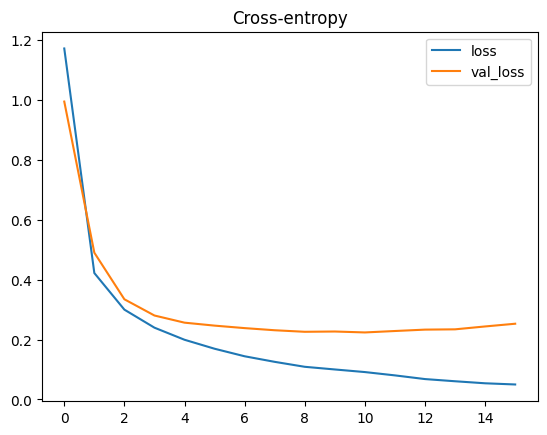

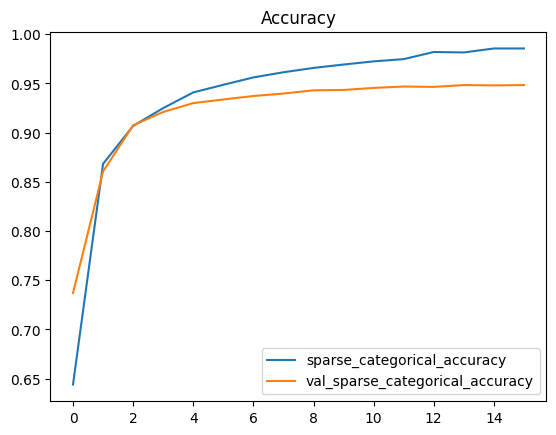

In [51]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot(title="Accuracy")

In [52]:
predictions = model.predict(test).argmax(axis=1)
predictions_df = pd.DataFrame({
    'ImageId': range(1, len(predictions) + 1),
    'Label': predictions,
})
predictions_df


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [53]:
submission_file_name = f'submission_{pd.Timestamp.now().strftime("%Y-%m-%d_%H-%M-%S")}.csv'
predictions_df.to_csv(submission_file_name, index=False)